## 캐글 데이터셋

In [11]:
## 파일 경로
## 문장
# file_path_train_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/train.hate.csv"
# file_path_dev_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/dev.hate.csv"
# file_path_unlabeled_comments = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/unlabeled_comments.txt"
# file_path_no_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/test.hate.no_label.csv"
# file_path_kold_v1 = "/content/drive/MyDrive/공부/자연어 처리/자료/kold_v1.json"
# file_path_youtube_comments = "/content/drive/MyDrive/공부/자연어 처리/자료/comments_update_df.csv"
# file_path_trip = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/tripadviser_review.csv"
# file_path_drama = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/Dataset.csv"
# file_path_common = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/common_word.csv"

# ## 단어
# file_path_pos_word = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/pos_word.csv"
# file_path_neg_word = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/neg_word.csv"
# file_path_unknown = "/content/drive/MyDrive/공부/자연어 처리/자료/KnuSentiLex/obj_unknown_pol_word.txt"
# file_path_senti_dict = "/content/drive/MyDrive/공부/자연어 처리/자료/KnuSentiLex/SentiWord_Dict.txt"
# file_path_stopwords = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/stopwords.txt"

file_path_change_label = './데이터/changed_label.csv'
file_path_stopwords = './데이터/불용어사전.txt'

In [12]:
"""
[문장]
df_train_hate : 
 - label 있음.
 - none         3486
 - offensive    2499
 - hate         1911


df_dev_hate :
 - label 있음.
 - offensive    189
 - none         160
 - hate         122


df_unlabeled_comments : label 없음
df_no_hate : label 없음
df_kold_v1 : label 없음
df_youtube_comments : label 없음,  좋아요 수 있음


[단어]
pos_word.csv
neg_word.csv
obj_unknown_pol_word.txt
SentiWord_Dict.txt
"""

import pandas as pd
import numpy as np


## 문장
# df_train_hate = pd.read_csv(file_path_train_hate, encoding='utf-8', engine='python')
# df_dev_hate = pd.read_csv(file_path_dev_hate, encoding='utf-8', engine='python')
# df_unlabeled_comments = pd.read_table(file_path_unlabeled_comments, encoding='utf-8', engine='python', names=['comment'],)
# df_no_hate = pd.read_csv(file_path_no_hate, encoding='utf-8', engine='python')
# df_kold_v1 = pd.read_json(file_path_kold_v1, encoding='utf-8')
# df_youtube_comments = pd.read_csv(file_path_youtube_comments, encoding='utf-8', engine='python')
# df_trip = pd.read_csv(file_path_trip, encoding='utf-8', engine='python')
# df_kdrama_common = pd.read_csv(file_path_common, encoding='utf-8', engine='python',)


## 단어
# df_pos_word = pd.read_csv(file_path_pos_word, encoding='utf-8', engine='python')
# df_neg_word = pd.read_csv(file_path_neg_word, encoding='utf-8', engine='python')
# df_unknown_word = pd.read_table(file_path_unknown, encoding='utf-8', engine='python', names=['word'])
new_df = pd.read_csv(file_path_change_label, encoding='utf-8', engine='python')
new_df

,text,y
0,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,3
1,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",3
2,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,3
3,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,3
4,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,3
...,...,...
16159,안정감,3
16160,적극적이다,3
16161,승리,3
16162,승리하다,3


## 자연어 처리 시작

### 자연어 처리 모듈 임포트

In [15]:
import Preprocessing as prep
import Visualization as vis

In [16]:
stopwords_list = ['제주도', '호스텔', '위치', '대중교통', '타고', '어디', '공항', '잠깐', '직원', '택시', '상품',]
stopwords_list = prep.stopwords(file_path_stopwords, stopwords_list)

In [17]:
prep.text_cleaning(new_df.text[5400], stopwords_list)

['어쩌면', '이다해', '승리', '승리']

### 문서-단어 행렬 생성

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer= lambda x: prep.text_cleaning(x, stopwords_list))
bow_vect = vect.fit_transform(new_df['text'].tolist())

In [19]:
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)
count_list

array([ 5,  1, 15, ...,  1,  1,  1], dtype=int64)

In [39]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 5,
 '가가린': 1,
 '가게': 15,
 '가격': 262,
 '가격표': 1,
 '가관': 2,
 '가구': 12,
 '가급': 1,
 '가기': 23,
 '가까이': 24,
 '가끔': 10,
 '가나': 4,
 '가난': 5,
 '가난뱅이': 1,
 '가년': 1,
 '가능': 12,
 '가능성': 4,
 '가다가': 1,
 '가담': 1,
 '가당': 1,
 '가도': 8,
 '가동': 2,
 '가두': 1,
 '가드': 1,
 '가득': 5,
 '가든': 2,
 '가라': 6,
 '가락': 2,
 '가래': 2,
 '가량': 5,
 '가려움': 1,
 '가렴': 1,
 '가렵': 1,
 '가로': 7,
 '가로본능폰': 1,
 '가로세로': 3,
 '가로수길': 1,
 '가루': 2,
 '가르침': 3,
 '가마니': 1,
 '가면': 21,
 '가몬': 1,
 '가무': 1,
 '가문': 1,
 '가물': 1,
 '가뭄': 2,
 '가미': 1,
 '가방': 4,
 '가버': 1,
 '가보': 1,
 '가봉': 1,
 '가쁘': 8,
 '가쁜': 2,
 '가사': 5,
 '가성': 51,
 '가세': 9,
 '가소': 1,
 '가수': 29,
 '가스': 1,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 22,
 '가슴앓이': 2,
 '가시': 4,
 '가식': 2,
 '가신': 4,
 '가안': 1,
 '가야': 20,
 '가오': 1,
 '가옥': 1,
 '가요': 17,
 '가요무대': 1,
 '가요제': 1,
 '가용': 2,
 '가운데': 4,
 '가운데손가락': 1,
 '가위': 1,
 '가을': 5,
 '가인': 3,
 '가장': 55,
 '가점': 1,
 '가정': 14,
 '가정불화': 1,
 '가정사': 2,
 '가정식': 2,
 '가정폭력': 3,
 '가족': 137,
 '가족사': 1,
 '가족사진': 1,
 '가족영화': 2,
 '가즈': 11,
 '가지': 77,
 '가짐': 3,
 '가짓수':

### TF-IDF 생성

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf_vect = tfidf.fit_transform(bow_vect)
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 단어 맵핑

In [41]:
invert_index_vectorizer = {v : k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer[2928]

'무궁무진'

In [42]:
vect.vocabulary_

{'여행': 5870,
 '집중': 8197,
 '휴식': 10086,
 '제공': 7680,
 '호텔': 9883,
 '선정': 4441,
 '청소': 8419,
 '청결': 8413,
 '상태': 4285,
 '침대': 8673,
 '이불': 6794,
 '침구': 8672,
 '교체': 821,
 '어메니티': 5652,
 '보강': 3608,
 '베스트': 3539,
 '웨스턴': 6447,
 '회원': 10025,
 '경우': 487,
 '객실': 299,
 '층수': 8635,
 '요청': 6274,
 '적극': 7441,
 '반영': 3288,
 '지인': 8087,
 '소개': 4594,
 '처음': 8367,
 '당황': 1838,
 '세면': 4546,
 '도구': 1994,
 '잠옷': 7290,
 '필수': 9439,
 '그것': 1000,
 '정도': 7594,
 '박만': 3221,
 '저녁': 7422,
 '맥주': 2691,
 '한잔': 9578,
 '렌트': 2382,
 '뚜벅': 2290,
 '버스': 3468,
 '정류': 7599,
 '도착': 2046,
 '가방': 47,
 '일찍': 7087,
 '정비': 7614,
 '방이': 3382,
 '입실': 7136,
 '업그레이드': 5747,
 '정말': 7604,
 '바다': 3183,
 '전망': 7484,
 '전일': 7516,
 '함덕': 9610,
 '대명': 1871,
 '콘도': 8799,
 '실내': 5198,
 '분위기': 3843,
 '손님': 4679,
 '가장': 79,
 '배치': 3428,
 '대해': 1933,
 '대응': 1898,
 '써비스': 5292,
 '조식': 7770,
 '부분': 3763,
 '신경': 5119,
 '아주': 5376,
 '특급': 9086,
 '트랜디': 9059,
 '고민': 557,
 '흔적': 10116,
 '여름': 5838,
 '수영장': 4788,
 '사용': 4142,
 '보고': 3612,
 '엄마':

### 모델링

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators' : [100, 300, 500, 700, 1000, 1500, 2000, 3000],
    'max_depth' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'max_features' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'bootstrap' : [True, False],
    'n_jobs' : [-1, 0, 1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
}



x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, new_df['y'], shuffle=True, test_size=0.2, stratify=new_df.y, random_state=33)

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, n_jobs=-1)

# model = RandomForestClassifier(random_state=33)
y_pred = grid.fit(x_train, y_train)
# ?RandomForestClassifier

In [27]:
accuracy_score(y_pred, y_test)
    
    
    
    
    
    
    

0.7200742344571606

In [28]:
None, 'micro', 'macro', 'weighted', 'samples'

(None, 'micro', 'macro', 'weighted', 'samples')

In [29]:
recall_score(y_pred, y_test, average='macro')

0.7435120405543785

In [30]:
precision_score(y_pred, y_test, average='macro')

0.7258267386778264

In [31]:
f1_score(y_pred, y_test, average='macro')

0.7099604003400316

In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70      1398
           2       0.93      0.78      0.85      1230
           3       0.45      0.83      0.58       605

    accuracy                           0.72      3233
   macro avg       0.73      0.74      0.71      3233
weighted avg       0.78      0.72      0.73      3233



In [33]:
confusion_matrix(y_pred, y_test)

array([[866,  46, 486],
       [145, 959, 126],
       [ 73,  29, 503]], dtype=int64)

## YoutubeAPI 실습

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")               # 경고 메시지 무시
# warnings.filterwarnings(action='default')     # 경고 메시지 활성화

plt.rcParams['axes.unicode_minus'] = False      # Glyph 8722 오류 해결을 위한 설정
plt.rcParams["figure.figsize"] = (12, 9)        # 그림 크기 설정
plt.rc('font', family='Malgun Gothic')       # 한글 폰트 설정
sns.set_theme()                                 # Seaborn의 테마 자동 설정

In [3]:
from CrawlingModule import YoutubeBulider

def api_key():
    infile = open("C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/api_key.txt", 'r')
    key = infile.readline()
    return key
    

In [ ]:
# yotube_API를 이용한 인기 급상승 video_id 가져오기
# build = YoutubeBulider(api_key())
# most_pop_videos = build.get_videos(chart='UCQ2O-iftmnlfrBuNsUUTofQ')
# most_pop_videos

In [10]:
import json

with open('most_popular_videos.json', 'w') as json_file:
    json.dump(most_pop_videos, json_file)

In [4]:
from CrawlingModule import YoutubeBulider

bulider = YoutubeBulider(api_key())

# Channel_id ㅇㄷ? [추가요망]


# 특정 채널의 동영상 100개만 가져오기
video_list = bulider.get_videoId_in_channel(channelId='UCZ0bi2aVJngKLwFTU5g_fLQ')

categoryId_list = bulider.get_categoryId_in_channel(videoId_list=video_list)

print(len(categoryId_list))
video_list

100


['ljP6X7gfNu8',
 'rxeo-arlQd0',
 'ZZfP4Si9nZk',
 'pIiv6jd3TDE',
 'DZ-q7Z730mc',
 'IAN-5KEO2Wo',
 'k96_lzExaCk',
 'boom2zV3qXI',
 'MeqISU8xNMs',
 '7CEt9gHqh2I',
 '0KNFV2-uFvc',
 'H6q7InrtNzk',
 'Xh25c5IPAcg',
 'rdIgXWL9PuI',
 '0Qtq7o6vLbg',
 'Hm6WHAQMJdo',
 'hWQ5imsk3Tc',
 '41KBYCaWk7o',
 '9tvjkFJghJA',
 'leXEuSs_-Lk',
 'VPuV2m_S0Gs',
 'k0QXTO0pdGE',
 'VmS8419wbCY',
 'K188Lexb2OY',
 'NxRTbRZDLfg',
 'IkLnfTyTGdQ',
 'z7dNSpOd0pw',
 'P1UmoQujgfY',
 'DLolSfWmEg0',
 '1Tq2Vb4wP7o',
 '4xYTafywOIQ',
 '3NvufqmGP-o',
 '_YL2bVRvyXI',
 '-i5WbkdmF1M',
 'i-UoNNQpRkQ',
 'xvWNHl3eaaY',
 'WRRwyhvaJlY',
 'zrN-ybe49lg',
 'TWrtdb5dFuo',
 'gqoWCzzcORg',
 '8JgkBFbO6oM',
 '0n8cLEDd8bM',
 'EWZGdQDsh7A',
 'GN73Q2xnwZw',
 'pgNC2d5Qxnw',
 '6uLofnzh3kk',
 'BNFVafiZ8cE',
 'pMrUQHSyQzs',
 '34opuHgvVr4',
 'D9o-_Op2bZc',
 '95dFtxdrno4',
 '0ruk5wnUdSc',
 'PdN3rxu_LNU',
 'PRc4H90RoeU',
 'T65PZXxD7tw',
 'qnK7XnHQyC0',
 'gcDYS2TDRMA',
 'gHXKc3K8pbw',
 'c2ZDfBA9dx0',
 'HJUq5NaDljc',
 'ZvHnbHOIerk',
 'qZRxPDygMgY',
 'SoR2Jm

In [5]:
categoryId_list

['20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '24',
 '24',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20']

In [25]:
import pandas as pd 

df = pd.DataFrame(
    {
        'video_id' : video_list, 
        'category_id' : categoryId_list,
        'category_name' : 'N',
    }
)
df.category_id = df.category_id.astype(int)


infile = open('../자료/category_id_value.txt', 'r').readlines()
category_key_value = {}

for line in infile:
    key_value_list = line.split(':')
    category_key_value[int(key_value_list[0])] = key_value_list[1][1:-2]

def invert_category_name(category_Id:int) -> str:
    return category_key_value[category_Id]

df.category_name = df.category_id.apply(invert_category_name)
df


,video_id,category_id,category_name
0,Ynwm92g2hxQ,20,Gamin
1,a4abVmaMj5A,20,Gamin
2,TUTMzIP_Mv0,20,Gamin
3,zrN-ybe49lg,20,Gamin
4,PuRqyxLxTTc,20,Gamin
...,...,...,...
95,u9zKB3s-R1A,20,Gamin
96,De0mePZH0rI,20,Gamin
97,Bb43QlfkCAE,20,Gamin
98,wEa_8r0R3P8,20,Gamin


In [21]:
df.category_name.value_counts()

Gamin             99
News & Politic     1
Name: category_name, dtype: int64

### 김성회의 G식백과

In [1]:
import pandas as pd

df_gsic_videos = pd.read_csv("../자료/김성회의_G식백과_videos.csv", encoding='utf-8', engine='python')
df_gsic_comments = pd.read_csv("../자료/김성회의_G식백과_comments.csv", encoding='utf-8', engine='python')

df_gsic_videos.uploaded_at = pd.to_datetime(df_gsic_videos['uploaded_at'])

In [113]:
df_gsic_videos

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at
0,ljP6X7gfNu8,20,Gaming,[메이플 리부트] 2년전 보보보 사태의 나비효과,775308,9307,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,20,Gaming,[호그와트 레거시 초대박] 은 해리포터 덕들의 집안잔치일까?,609524,8285,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,20,Gaming,[챗GPT] 챗봇 쩌는 게 게임이랑 무슨 상관이겠냐,169142,3985,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,20,Gaming,제이스 성우가 부자되는 법 남도형 #shorts,58622,530,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,제이스 잘하는 법: 우리 남도형 성우는 안 물어요 #shorts,38521,479,2023-02-02 18:53:03+00:00
...,...,...,...,...,...,...,...
95,PO5qOK3buzs,20,Gaming,"아시안게임 국가대표 선발이 장난이냐? 누가, 어떻게, 왜",638952,9629,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,20,Gaming,그들은 왜 이걸 끊지 못하는가 [서머너즈 워 8주년],118604,2600,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,20,Gaming,침착맨이 보는 히오스의 인류사적 (개)가치 [G식의밤 2시즌 히오스 편 #1],514660,6606,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,20,Gaming,던파가 어딜 감히 [G식의 밤 2시즌 던파 #2],234575,3284,2022-04-06 07:57:45+00:00


#### EDA

In [114]:
df_gsic_comments.head(3)

,video_id,comment_id,comment,like_count,created_at,updated_at
0,ljP6X7gfNu8,Ugz5zYEB342yAGPfy0x4AaABAg,리부트에서 하루1재획씩 반년동안 꾸준히하면서 상의 스타포스만 했는데 22성 한번도 ...,1,2023-02-23T01:42:39Z,2023-02-23T01:42:39Z
1,ljP6X7gfNu8,UgyslPz6vHxf5IzAHZ54AaABAg,그니까 결국 메이플이 돈독올라서 최근 출시되는 캐쉬템들을 착용 시 교불템으로 출시해...,0,2023-02-23T01:39:05Z,2023-02-23T01:39:05Z
2,ljP6X7gfNu8,UgzyoEJNZHqCe6qGlFh4AaABAg,큐브 논란 있을때 다 팔고 로아로 넘어간게 크네 기존 유저는 무한 데자뷰네 ㅋㅋ,0,2023-02-23T01:33:06Z,2023-02-23T01:33:06Z


In [21]:
# df_gsic_comments.updated_at = df_gsic_comments.updated_at.str.replace('Z', '')
df_gsic_comments.video_id.value_counts()

T65PZXxD7tw    6560
VmS8419wbCY    3780
6uLofnzh3kk    2780
KNLI1x7bLVE    2709
EPdcfx5Y95g    2561
               ... 
PdN3rxu_LNU     101
z7dNSpOd0pw      79
hWQ5imsk3Tc      28
DZ-q7Z730mc      13
pIiv6jd3TDE       9
Name: video_id, Length: 100, dtype: int64

In [65]:
df_gsic_videos.category_name.value_counts()

Gaming           98
Entertainment     2
Name: category_name, dtype: int64

In [66]:
df_gsic_videos

,video_id,category_id,category_name,views_count,like_count,uploaded_at
0,ljP6X7gfNu8,20,Gaming,765798,9250,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,20,Gaming,606218,8253,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,20,Gaming,168363,3974,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,20,Gaming,58482,528,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,38395,477,2023-02-02 18:53:03+00:00
...,...,...,...,...,...,...
95,PO5qOK3buzs,20,Gaming,638941,9629,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,20,Gaming,118602,2600,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,20,Gaming,514635,6607,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,20,Gaming,234571,3284,2022-04-06 07:57:45+00:00


In [30]:
df_gsic_videos.dtypes

video_id                      object
category_id                    int64
category_name                 object
views_count                    int64
like_count                     int64
uploaded_at      datetime64[ns, UTC]
dtype: object

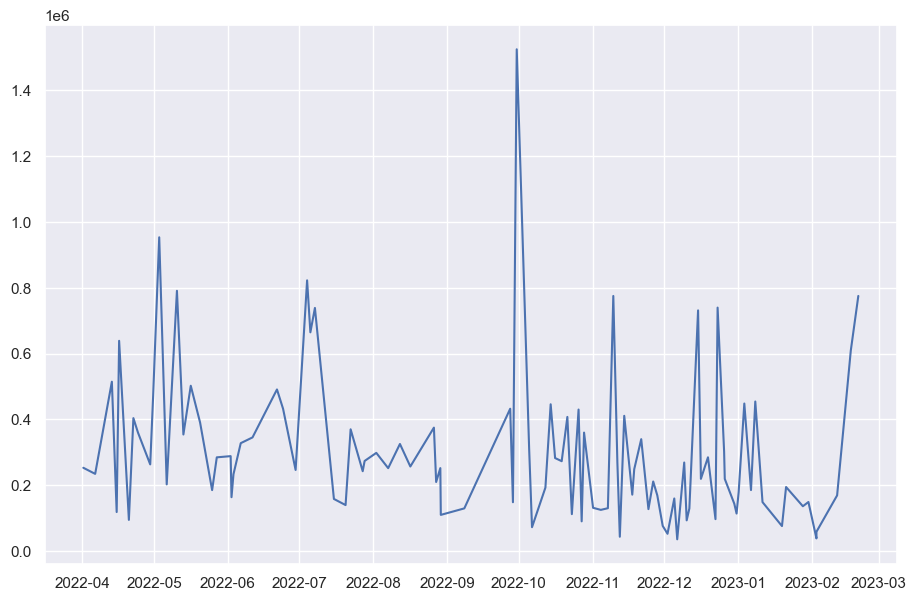

In [156]:
plt.rcParams['figure.figsize'] = (11, 7)

plt.plot(df_gsic_videos['uploaded_at'], df_gsic_videos['views_count'])

plt.show()

In [157]:
df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month == 2, ['video_id', 'views_count', 'uploaded_at']].sort_values(by='views_count', ascending=False)

,video_id,views_count,uploaded_at
0,ljP6X7gfNu8,775308,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,609524,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,169142,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,58622,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,38521,2023-02-02 18:53:03+00:00


In [51]:
df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month != 9, ['video_id', 'views_count', 'uploaded_at']]

,video_id,views_count,uploaded_at
0,ljP6X7gfNu8,765798,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,606218,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,168363,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,58482,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,38395,2023-02-02 18:53:03+00:00
...,...,...,...
95,PO5qOK3buzs,638941,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,118602,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,514635,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,234571,2022-04-06 07:57:45+00:00


In [49]:
df_gsic_videos.sort_values(by='views_count', ascending=False)

,video_id,category_id,category_name,views_count,like_count,uploaded_at
54,T65PZXxD7tw,20,Gaming,1524766,39224,2022-09-30 02:30:13+00:00
89,afBygzscoo0,20,Gaming,953491,20431,2022-05-03 04:34:33+00:00
73,KNLI1x7bLVE,20,Gaming,822703,19951,2022-07-04 04:49:26+00:00
87,gTgGUEgbLLE,20,Gaming,790915,14468,2022-05-10 14:52:13+00:00
39,gqoWCzzcORg,20,Gaming,775200,12743,2022-11-09 14:24:49+00:00
...,...,...,...,...,...,...
3,pIiv6jd3TDE,20,Gaming,58482,528,2023-02-02 18:53:47+00:00
28,DLolSfWmEg0,20,Gaming,52477,867,2022-12-02 08:00:10+00:00
37,zrN-ybe49lg,20,Gaming,43532,1161,2022-11-12 08:00:34+00:00
4,DZ-q7Z730mc,20,Gaming,38395,477,2023-02-02 18:53:03+00:00


In [115]:
most_watched_video_9 = df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month == 9, ['video_id', 'views_count']].sort_values(by='views_count', ascending=False).values[0][0]
most_watched_video_9
gsic_best_comment_9 = df_gsic_comments.loc[df_gsic_comments['video_id'] == most_watched_video_9, ['video_id', 'comment', 'like_count', 'created_at']].sort_values(by='like_count', ascending=False)
gsic_best_comment_9

,video_id,comment,like_count,created_at
40330,T65PZXxD7tw,들어보니깐 이미 존재하고 있는 한국기업과 외국기업의 불평등을 해결하기 위해서라면 외...,7429,2022-09-30T03:22:08Z
40525,T65PZXxD7tw,망사용료법이 국익에 도움이 되니까 국민이 희생해야 한다는 21세기 전체주의 국가 대...,6115,2022-09-30T03:02:10Z
39604,T65PZXxD7tw,제발 꼭 국내 이통사의 패배를 간절히 바랍니다.,4777,2022-09-30T04:11:43Z
40610,T65PZXxD7tw,한국 대기업이란 것들은 전부 왜 이 꼬라지냐?,4233,2022-09-30T02:42:22Z
38833,T65PZXxD7tw,국내 이통사의 개수작이 반드시 좌절 되었으면 좋겠네요.,3852,2022-09-30T05:41:48Z
...,...,...,...,...
36683,T65PZXxD7tw,외국은 트윕 비트 잘만쓰는데 한국은 투네이션으로 개꿀빨고 수익은 수익대로안되서 런한...,0,2022-09-30T17:14:48Z
36680,T65PZXxD7tw,국회든 통신사든 애국이라는 슬로건 내놓고 지들 돈 어케하면 벌까 궁리만.........,0,2022-09-30T17:18:09Z
36679,T65PZXxD7tw,의원들 통신장사꾼들 진짜 부끄러운줄 알아라. 일제시대때 친일매국노랑 다를게 뭐냐. ...,0,2022-09-30T17:19:08Z
36677,T65PZXxD7tw,그냥 뭐좀 드셨나보네,0,2022-09-30T17:23:23Z


In [126]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import Preprocessing as prep

stopwords = prep.stopwords("C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/stopwords.txt", [])
stopwords

vect = CountVectorizer(tokenizer = lambda x: prep.text_cleaning(x, stopwords))
bow_vect = vect.fit_transform(gsic_best_comment_9['comment'])
bow_vect

<6559x7610 sparse matrix of type '<class 'numpy.int64'>'
	with 55975 stored elements in Compressed Sparse Row format>

In [155]:
shorts_bool = df_gsic_videos.title.str.contains('#shorts')




,video_id,category_id,category_name,title,views_count,like_count,uploaded_at
3,pIiv6jd3TDE,20,Gaming,제이스 성우가 부자되는 법 남도형 #shorts,58622,530,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,제이스 잘하는 법: 우리 남도형 성우는 안 물어요 #shorts,38521,479,2023-02-02 18:53:03+00:00
16,hWQ5imsk3Tc,20,Gaming,웰메이드 똥겜 : 염소 시뮬레이터 #shorts,219356,3362,2022-12-26 08:09:39+00:00


### 침착맨

In [1]:
import pandas as pd
import Preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rc('font', family="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (11, 8)

import re


df = pd.read_csv('../자료/침착맨_videos.csv', encoding='utf-8', engine='python')
df.rename(columns={'description' : "hashtag"}, inplace=True)
human_list = pd.read_table('../자료/chim_dict.txt', encoding='utf-8', engine='python', sep='\t')

df.uploaded_at = pd.to_datetime(df.uploaded_at)
df.hashtag = df.hashtag.apply(lambda x: prep.extract_hashtags(x, "#침착맨 "))
# df.hashtag = df.hashtag.str.replace("#침착맨 ", "")
df.head(3)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,hashtag
0,5ahN5s59M5I,24,Entertainment,약 한 달 밀린 속보들,321217,5362,2023-02-23 10:00:03+00:00,#뉴스
1,4DLCaQZ6VC4,24,Entertainment,시디즈 실전용 게이밍 의자 (a.k.a 교잡종),359598,4251,2023-02-22 10:00:02+00:00,#시디즈GCPRO #GCPRO #시디즈게이밍의자 #진짜게임을시작한당신에게 #그렇게게...
2,l1Vncs1qw_M,24,Entertainment,(잔인주의) 너굴맨의 개과천선,312871,3790,2023-02-21 10:00:34+00:00,#레데리2 #reddeadredemption


In [3]:
human_list_path = "../자료/chim_dict.txt"

most_hash_df = prep.most_used_hashtag_df(df).copy()
most_hash_df.hashtag = most_hash_df.hashtag.apply(lambda text: prep.extract_human_hashtag(text, df, human_list_path))
most_hash_df.head(4)


human_hash_df = df.copy()
human_hash_df.hashtag = human_hash_df.hashtag.apply(lambda text: prep.extract_human_hashtag(text, df, human_list_path))
human_hash_df.hashtag.value_counts()

None          39
#통닭천사          6
#주호민           5
#김풍 #주호민       5
#곽민수           4
#주호민 #김풍       4
#김풍            4
#궤도 #김풍        3
#주우재           3
#피식대학 #박정민     3
#배도라지          2
#남도형           2
#주호민 #통닭천사     2
#류준열 #박정민      2
#임용한           2
#카더가든 #비비      2
#박지성 #배성재      2
#김풍 #심윤수       1
#뉴진스 #주우재      1
#통닭천사 #김아랑     1
#김준표 #이은결      1
#미노이           1
#승우아빠          1
#최고민수          1
#김풍 #임세모       1
#비비            1
#양정무 #주호민      1
Name: hashtag, dtype: int64

In [7]:
prep.hashtag_list(df)[:10]

['#뉴스',
 '#시디즈GCPRO',
 '#GCPRO',
 '#시디즈게이밍의자',
 '#진짜게임을시작한당신에게',
 '#그렇게게이머가된다',
 '#레데리2',
 '#reddeadredemption',
 '#카더가든',
 '#비비']

In [17]:
most_used_hashtag = prep.most_used_hashtag_df(df)
(most_used_hashtag.hashtag.str.contains('주우재') == True).sum()

4

In [20]:
df.loc[df.hashtag.str.contains('주우재')].head(3)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,description
44,cspfdOFcOsE,24,Entertainment,한국 좀비사태 발생시 필요한 현실능력 월드컵,1657901,11849,2023-01-10 10:00:29+00:00,#주우재
50,RRnO-9xfJY8,24,Entertainment,많이 먹는 사람과 많이 먹기,1294209,13895,2023-01-03 10:00:21+00:00,#주우재
48,SP-LJqVgQuw,24,Entertainment,[ENG] 뉴진스 초대석,3826448,58458,2023-01-05 10:00:10+00:00,#주우재


In [21]:
prep.most_used_hashtag_list(df)

['None', '#주호민', '#김풍']

In [22]:
prep.most_used_hashtag_df(df).head(3)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,description
2,l1Vncs1qw_M,24,Entertainment,(잔인주의) 너굴맨의 개과천선,312871,3790,2023-02-21 10:00:34+00:00,None
13,8hSds3puPQY,24,Entertainment,(잔인주의) 선량한 사람은 너굴맨이 처리했으니 안심하라구,461638,5099,2023-02-10 10:00:09+00:00,None
28,Wckcfh0Vu_E,24,Entertainment,서부개척시대 브이로그,653888,6467,2023-01-26 10:00:26+00:00,None


In [42]:
prep.most_used_hashtag_df(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 3 to 86
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       73 non-null     object             
 1   category_id    73 non-null     int64              
 2   category_name  73 non-null     object             
 3   title          73 non-null     object             
 4   views_count    73 non-null     int64              
 5   like_count     73 non-null     int64              
 6   uploaded_at    73 non-null     datetime64[ns, UTC]
 7   description    73 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 5.1+ KB


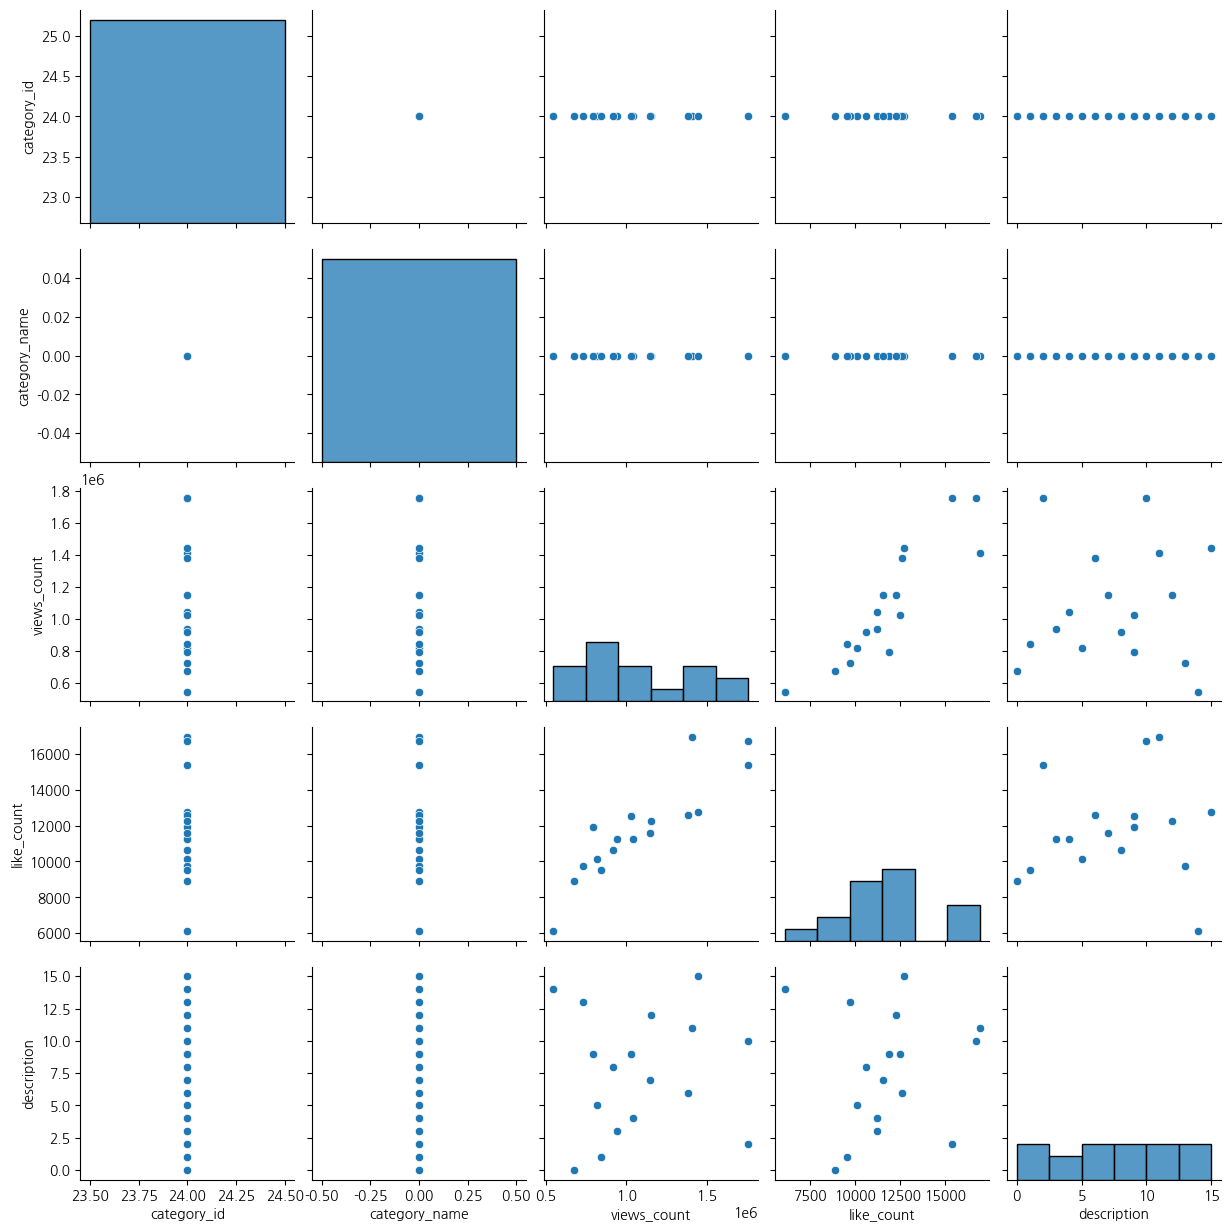

In [18]:
df_bool = (prep.most_used_hashtag_df(df).hashtag.str.contains('#주호민') == True)
plot_data = prep.most_used_hashtag_df(df).loc[df_bool]

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = plot_data.copy()
data['category_name'] = encoder.fit_transform(plot_data[['category_name']])
data['hashtag'] = encoder.fit_transform(plot_data[['hashtag']])
data

sns.pairplot(data=data)
plt.show()

#### 여기 하다 말음

In [16]:
x = most_hash_df.hashtag.unique()
y = most_hash_df.hashtag.value_counts().head(7).values
y

array([16,  7,  6,  6,  5,  4,  4], dtype=int64)

In [28]:
most_hash_list = list(set(prep.hashtag_list()))
['views_count']

29     460522
36     404134
43     454204
49    1280195
56     886229
       ...   
34    1381402
73    1152231
75    1149445
96    1443148
9      722815
Name: views_count, Length: 73, dtype: int64

#### 여기부터 자동화 할 것.

In [145]:
new_df = human_hash_df.copy()

for idx, value in enumerate(new_df.hashtag.unique()):
    if value != "None":
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name=value, w_tag_name=value, category_id=24)
    else:
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name="None", w_tag_name="#None", category_id=24)


# new_df.drop(new_df.loc[new_df.hashtag == "#None"].index, inplace=True)


for i in range(0, new_df.hashtag.nunique()):
    new_df.at[i, 'hashtag'] = i

new_df.hashtag = new_df.hashtag.astype(np.int64)

new_df.hashtag.value_counts()

0     1
14    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
13    1
1     1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
26    1
Name: hashtag, dtype: int64

#### 시각화

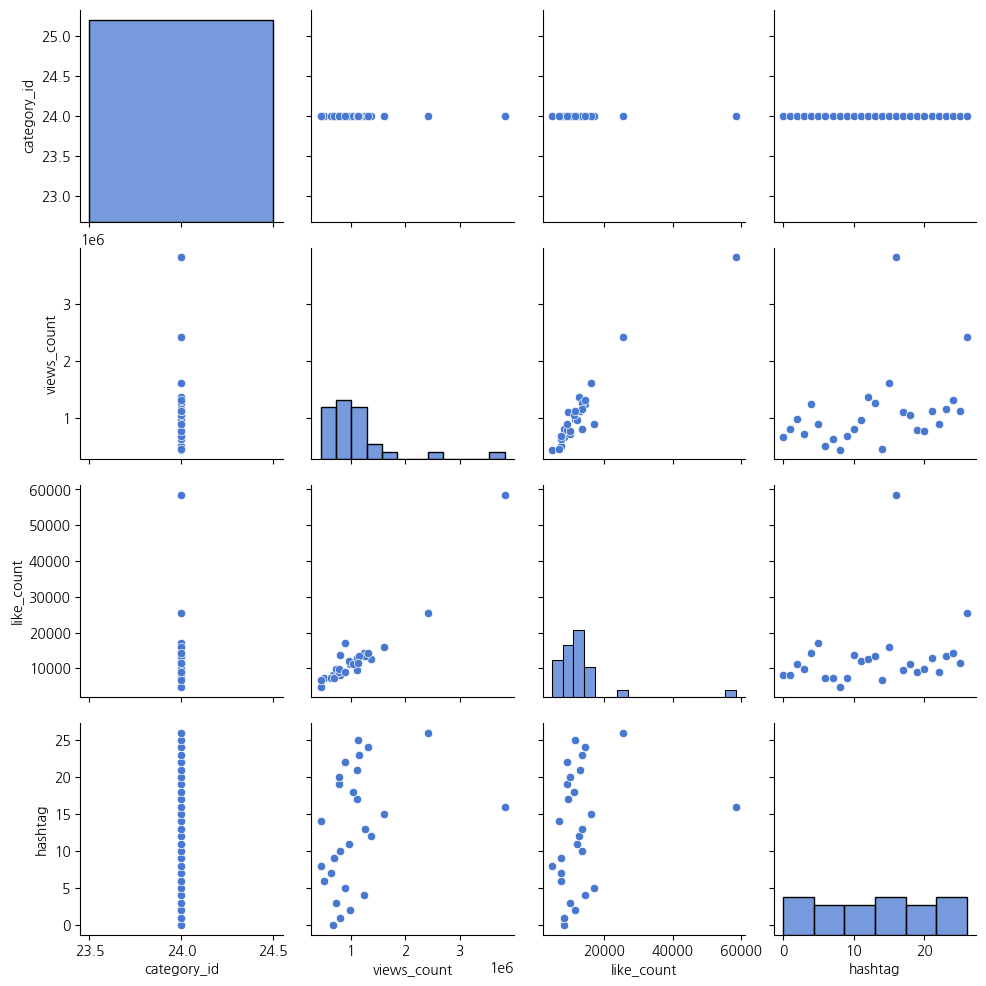

In [146]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_palette(palette="muted")

sns.pairplot(data=new_df)

plt.show()

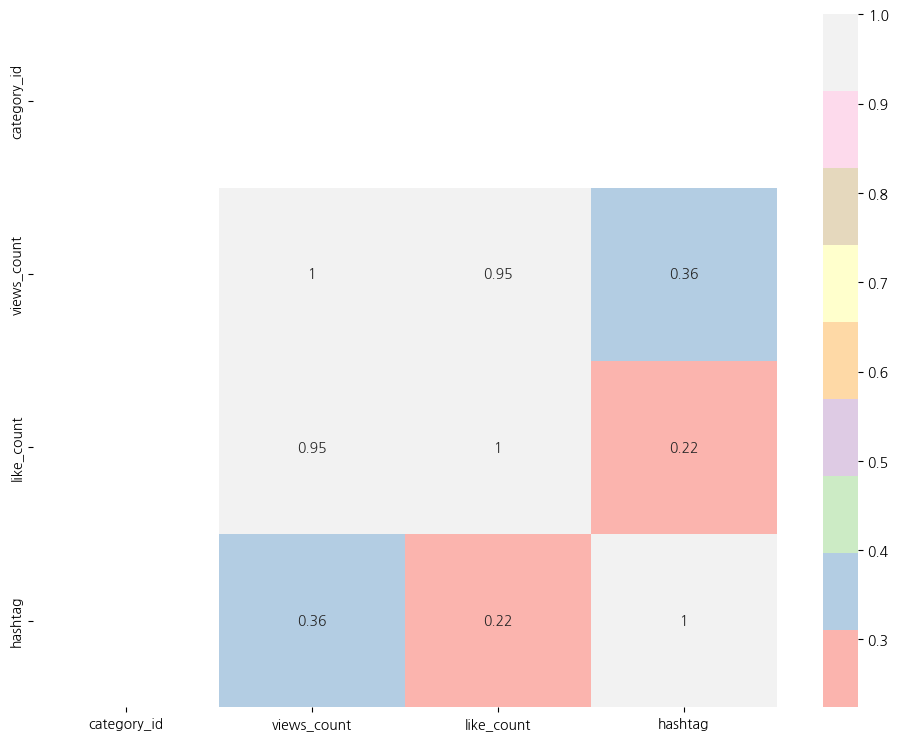

In [147]:
plt.rcParams['figure.figsize'] = (12, 9)

sns.heatmap(new_df.corr(), annot=True, cmap="Pastel1")

plt.show()

In [322]:
most_hash_df.loc[most_hash_df.hashtag.drop_duplicates().index, :]

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,hashtag
29,psBQFkE_6tc,24,Entertainment,"410:1 경쟁률, 병건이네 민박｜방랑화가 이병건｜FIN. 제주",460522,6533,2023-01-25 10:00:11+00:00,#통닭천사
90,jlIUXUYV4Zc,24,Entertainment,빈폴과 함께하는 침펄통 남친룩 대결,817717,10146,2022-11-11 10:00:26+00:00,#주호민 #통닭천사
2,l1Vncs1qw_M,24,Entertainment,(잔인주의) 너굴맨의 개과천선,312871,3790,2023-02-21 10:00:34+00:00,None
14,mdsaZz5WVHU,24,Entertainment,계속되는 남도형 성우와의 토크,883760,16098,2023-02-09 10:00:34+00:00,#남도형
3,7XRufU8uafs,24,Entertainment,학창 시절 가장 열받는 일 월드컵,738795,6879,2023-02-20 10:00:03+00:00,#카더가든 #비비
23,2K_q9U_PYOY,24,Entertainment,카트라이더: 드리프트 배도라지 그랑프리,353025,3311,2023-01-31 10:00:01+00:00,#배도라지
26,vagBS9UA6RE,24,Entertainment,이집트 전문가의 카트라이더 이집트 맵 분석하기,508785,6671,2023-01-28 10:00:39+00:00,#곽민수
37,2Wkn-e7MRKo,24,Entertainment,피식대학 세계관 등장인물 월드컵,767018,7238,2023-01-17 10:00:02+00:00,#피식대학 #박정민
80,6Hq9LzvbE7Y,24,Entertainment,계속되는 토크와 야추 다이스 대결,866079,9203,2022-11-24 10:00:03+00:00,#류준열 #박정민
21,mNECLrVkXLY,24,Entertainment,평범함에 대하여,494696,6933,2023-02-02 10:00:24+00:00,#김풍


In [306]:
new_df.loc[new_df.video_id == "SP-LJqVgQuw"]

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,hashtag


In [221]:
new_df.loc[new_df.hashtag == 1]

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,hashtag
1,몰라,24,Entertainment,몰라,9748315,108086,몰라,1


In [222]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       17 non-null     object
 1   category_id    17 non-null     int64 
 2   category_name  17 non-null     object
 3   title          17 non-null     object
 4   views_count    17 non-null     int64 
 5   like_count     17 non-null     int64 
 6   uploaded_at    17 non-null     object
 7   hashtag        17 non-null     int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 1.1+ KB


#### 결과물

In [240]:
df.views_count.sum() / len(df.views_count)

911828.53

In [241]:
df.sort_values(by='views_count', ascending=False).head(5)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,hashtag
48,SP-LJqVgQuw,24,Entertainment,[ENG] 뉴진스 초대석,3826448,58458,2023-01-05 10:00:10+00:00,#뉴진스 #주우재
97,jF2VkvXXHY4,24,Entertainment,해버지와 예측해 보는 카타르 월드컵 우승팀,2449674,19380,2022-10-28 10:00:39+00:00,#박지성 #배성재 #카타르월드컵
98,8-DYBQ8xQoQ,24,Entertainment,해버지 박지성 선수 초대석,2392038,31772,2022-10-26 10:00:05+00:00,#박지성 #배성재
92,UWcgWLph_os,24,Entertainment,거울치료,1891986,22529,2022-11-06 10:00:17+00:00,#주우재 #클라스크 #링피트
38,5l5OUajgNOA,24,Entertainment,안녕 구찌,1776296,19113,2023-01-16 10:00:02+00:00,#피식대학 #박정민 #구찌의자


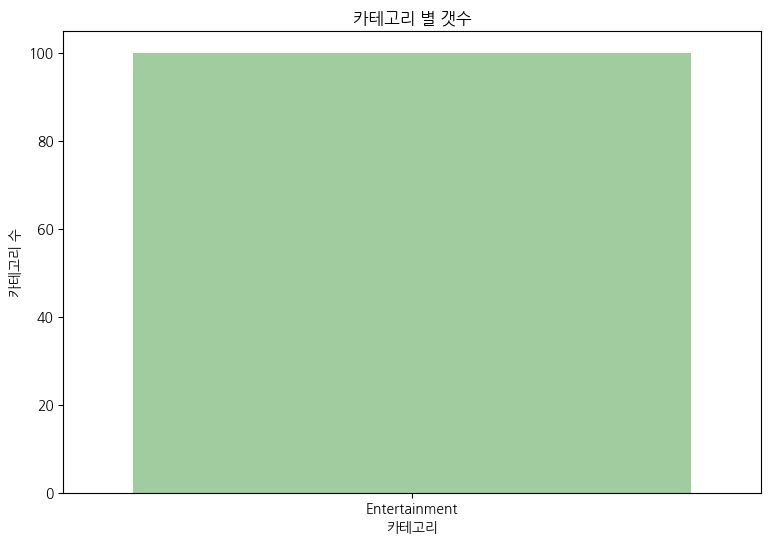

In [295]:
x = df.category_name.unique()
y = df.category_name.value_counts().values
# sns.set_theme(palette="")

plt.figure(figsize=(9, 6))

sns.barplot(x=x, y=y, alpha=0.8, palette='Accent')
plt.xlabel('카테고리')
plt.ylabel('카테고리 수')
plt.title('카테고리 별 갯수')

plt.show()

## 실험

In [ ]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'NanumGothic' == f.name:
        print(f'Font: {f.name}, Path: {f.fname}')


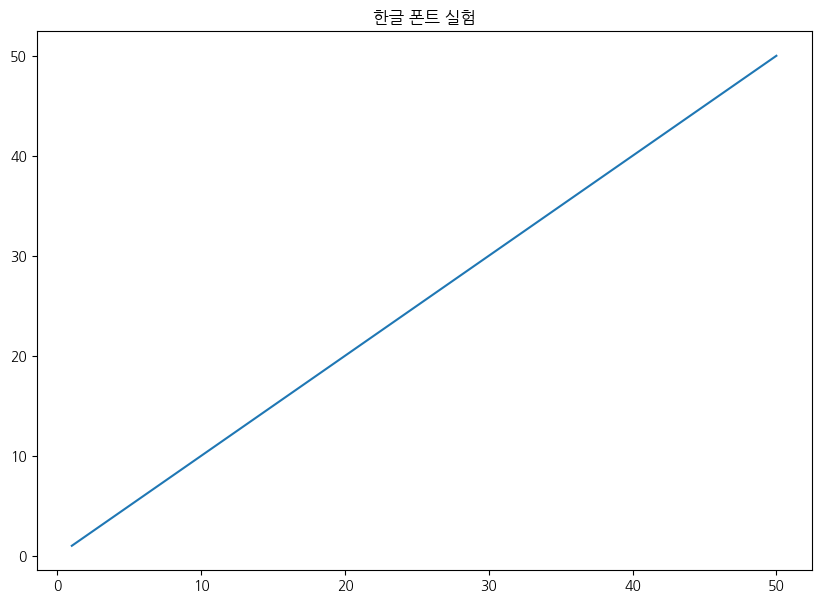

In [10]:
x = np.arange(1, 51)
y = np.arange(1, 51)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = (10, 7)

plt.plot(x, y)
plt.title("한글 폰트 실험")
plt.show()


In [ ]:
new_df = most_hash_df.copy()

# 김풍 #주호민[확인 완료]
kim_juper_views_count = most_hash_df.loc[(most_hash_df.hashtag == "#김풍 #주호민") | (most_hash_df.hashtag == "#주호민 #김풍")].views_count.sum() / len(most_hash_df.hashtag == "None")
kim_juper_like_count= most_hash_df.loc[(most_hash_df.hashtag == "#김풍 #주호민") | (most_hash_df.hashtag == "#주호민 #김풍")].like_count.sum() / len(most_hash_df.hashtag == "None")
kim_juper_index = new_df.loc[(new_df.hashtag == "#김풍 #주호민") | (new_df.hashtag == "#주호민 #김풍")].index
new_df.drop(kim_juper_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : kim_juper_views_count,
    'like_count' : kim_juper_like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#김풍 #주호민',
}, ignore_index=True)


tongdak_views_count = most_hash_df.loc[(most_hash_df.hashtag == "#통닭천사") | (most_hash_df.hashtag == "#통닭천사")].views_count.sum() / len(most_hash_df.hashtag == "None")
tongdak_juper_like_count= most_hash_df.loc[(most_hash_df.hashtag == "#통닭천사") | (most_hash_df.hashtag == "#통닭천사")].like_count.sum() / len(most_hash_df.hashtag == "None")

# 통닭천사[확인 완료]
tongdak_index = new_df.loc[(new_df.hashtag == "#통닭천사") | (new_df.hashtag == "#통닭천사")].index
new_df.drop(tongdak_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : tongdak_views_count,
    'like_count' : tongdak_juper_like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#통닭천사',
}, ignore_index=True)

# 김풍[확인 완료]
kimpoong_views_count = most_hash_df.loc[(most_hash_df.hashtag == "#김풍") | (most_hash_df.hashtag == "#김풍")].views_count.sum() / len(most_hash_df.hashtag == "None")
kimpoong_like_count= most_hash_df.loc[(most_hash_df.hashtag == "#김풍") | (most_hash_df.hashtag == "#김풍")].like_count.sum() / len(most_hash_df.hashtag == "None")

kimpoong_index = new_df.loc[(new_df.hashtag == "#김풍") | (new_df.hashtag == "#김풍")].index
new_df.drop(kimpoong_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : kimpoong_views_count,
    'like_count' : kimpoong_like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#김풍',
}, ignore_index=True)


# 주호민[확인 완료]
juper_views_count = most_hash_df.loc[(most_hash_df.hashtag == "#주호민") | (most_hash_df.hashtag == "#주호민")].views_count.sum() / len(most_hash_df.hashtag == "None")
juper_like_count= most_hash_df.loc[(most_hash_df.hashtag == "#주호민") | (most_hash_df.hashtag == "#주호민")].like_count.sum() / len(most_hash_df.hashtag == "None")
juper_index = new_df.loc[(new_df.hashtag == "#주호민") | (new_df.hashtag == "#주호민")].index
new_df.drop(juper_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : juper_views_count,
    'like_count' : juper_like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#주호민',
}, ignore_index=True)


# 주우재[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#주우재") | (most_hash_df.hashtag == "#주우재")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#주우재") | (most_hash_df.hashtag == "#주우재")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#주우재") | (new_df.hashtag == "#주우재")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#주우재',
}, ignore_index=True)


# 곽민수[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#곽민수") | (most_hash_df.hashtag == "#곽민수")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#곽민수") | (most_hash_df.hashtag == "#곽민수")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#곽민수") | (new_df.hashtag == "#곽민수")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#곽민수',
}, ignore_index=True)


# #궤도 #김풍[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#궤도 #김풍") | (most_hash_df.hashtag == "#궤도 #김풍")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#궤도 #김풍") | (most_hash_df.hashtag == "#궤도 #김풍")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#궤도 #김풍") | (new_df.hashtag == "#궤도 #김풍")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#궤도 #김풍',
}, ignore_index=True)


# #임용한[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#임용한") | (most_hash_df.hashtag == "#임용한")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#임용한") | (most_hash_df.hashtag == "#임용한")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#임용한") | (new_df.hashtag == "#임용한")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#임용한',
}, ignore_index=True)


# #남도형[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#남도형") | (most_hash_df.hashtag == "#남도형")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#남도형") | (most_hash_df.hashtag == "#남도형")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#남도형") | (new_df.hashtag == "#남도형")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#남도형',
}, ignore_index=True)


# #피식대학 #박정민[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#피식대학 #박정민") | (most_hash_df.hashtag == "#피식대학 #박정민")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#피식대학 #박정민") | (most_hash_df.hashtag == "#피식대학 #박정민")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#피식대학 #박정민") | (new_df.hashtag == "#피식대학 #박정민")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#피식대학 #박정민',
}, ignore_index=True)


# #박지성 #배성재[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#박지성 #배성재") | (most_hash_df.hashtag == "#박지성 #배성재")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#박지성 #배성재") | (most_hash_df.hashtag == "#박지성 #배성재")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#박지성 #배성재") | (new_df.hashtag == "#박지성 #배성재")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#박지성 #배성재',
}, ignore_index=True)


# #류준열 #박정민[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#류준열 #박정민") | (most_hash_df.hashtag == "#류준열 #박정민")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#류준열 #박정민") | (most_hash_df.hashtag == "#류준열 #박정민")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#류준열 #박정민") | (new_df.hashtag == "#류준열 #박정민")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#류준열 #박정민',
}, ignore_index=True)


# 배도라지[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#배도라지") | (most_hash_df.hashtag == "#배도라지")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#배도라지") | (most_hash_df.hashtag == "#배도라지")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#배도라지") | (new_df.hashtag == "#배도라지")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#배도라지',
}, ignore_index=True)


# #카더가든 #비비[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#카더가든 #비비") | (most_hash_df.hashtag == "#카더가든 #비비")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#카더가든 #비비") | (most_hash_df.hashtag == "#카더가든 #비비")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#카더가든 #비비") | (new_df.hashtag == "#카더가든 #비비")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#카더가든 #비비',
}, ignore_index=True)


# #주호민 #통닭천사[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "#주호민 #통닭천사") | (most_hash_df.hashtag == "#주호민 #통닭천사")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "#주호민 #통닭천사") | (most_hash_df.hashtag == "#주호민 #통닭천사")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "#주호민 #통닭천사") | (new_df.hashtag == "#주호민 #통닭천사")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#주호민 #통닭천사',
}, ignore_index=True)


# #침착맨_혼자[확인 완료]
views_count = most_hash_df.loc[(most_hash_df.hashtag == "None") | (most_hash_df.hashtag == "None")].views_count.sum() / len(most_hash_df.hashtag == "None")
like_count= most_hash_df.loc[(most_hash_df.hashtag == "None") | (most_hash_df.hashtag == "None")].like_count.sum() / len(most_hash_df.hashtag == "None")
df_index = new_df.loc[(new_df.hashtag == "None") | (new_df.hashtag == "None")].index
new_df.drop(df_index, inplace=True)
new_df = new_df.append({
    'video_id' : '몰라',
    'category_id' : 24,
    'category_name' : 'Entertainment',
    'title' : '몰라',
    'views_count' : views_count,
    'like_count' : like_count,
    'uploaded_at' : '몰라',
    'hashtag' : '#침착맨_혼자',
}, ignore_index=True)

for i in range(0, new_df.hashtag.nunique()):
    new_df.at[i, 'hashtag'] = i

new_df.hashtag = new_df.hashtag.astype(np.int64)

new_df.tail()